In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
sns.set(color_codes=True)

In [28]:
results_df_1 = pd.read_csv('HyperParameter_Results.csv')
results_df_2 = pd.read_csv('HyperParameter_Results_2.csv')
results_df = pd.concat([results_df_1, results_df_2])
del results_df['Unnamed: 0']

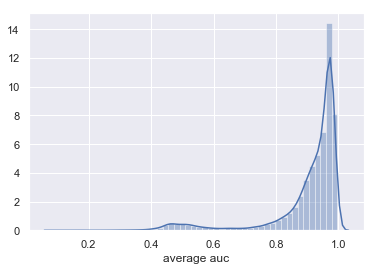

In [29]:
sns.distplot(results_df['average auc'])

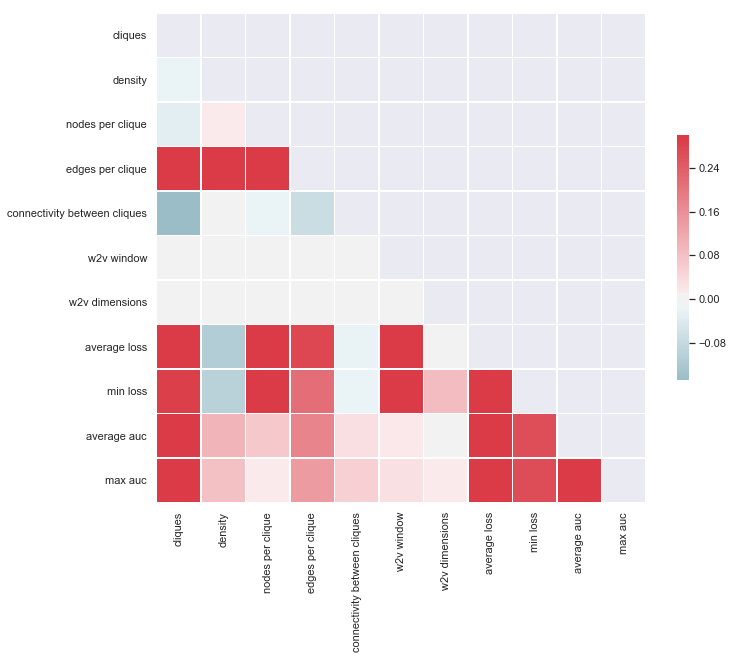

In [30]:
corr = results_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

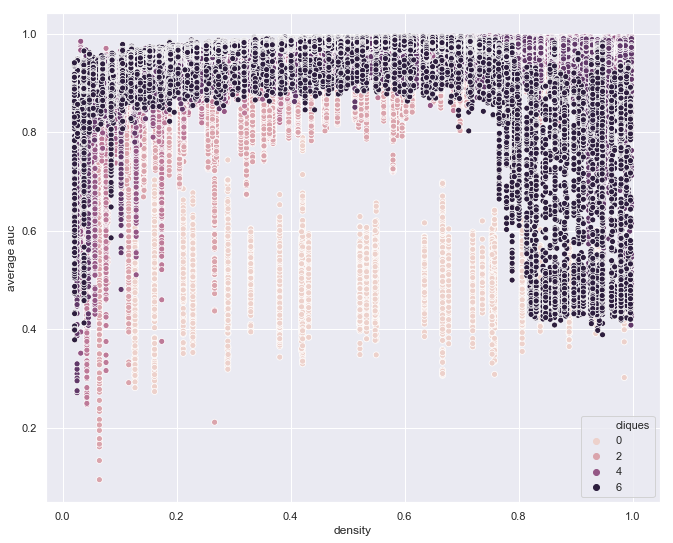

In [38]:
f, ax = plt.subplots(figsize=(11, 9))
sns.scatterplot(x=results_df['density'], y=results_df['average auc'], hue=results_df['cliques'])

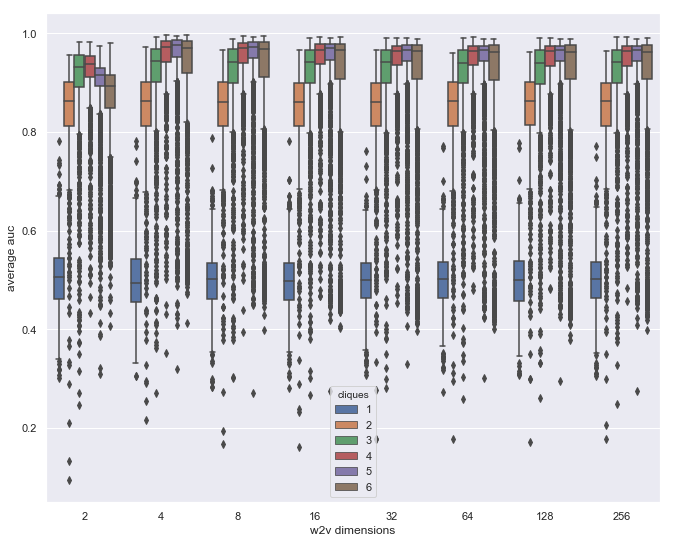

In [42]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x=results_df['w2v dimensions'], y=results_df['average auc'], hue=results_df['cliques'])

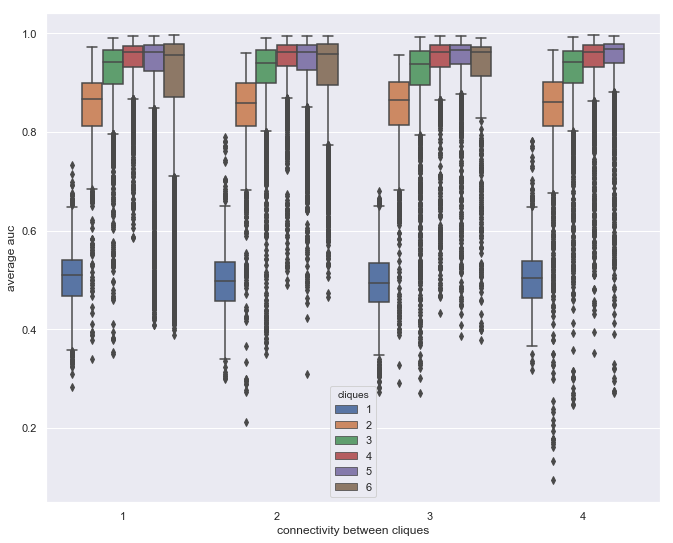

In [41]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x=results_df['connectivity between cliques'], y=results_df['average auc'], hue=results_df['cliques'])